In [150]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout,MaxPooling2D,Conv2D
import pickle

In [151]:
X=pickle.load(open("X.pickle","rb")) #load data
Y=pickle.load(open("Y.pickle","rb"))  #load data
X=X/255.0

In [152]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))   #convolution layer with relu activation
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))                          #convolution layer with relu activation
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())                               #Flatten layer with relu activation
model.add(Dense(64,Activation("relu")))            #Dense layer with activation relu

model.add(Dense(1))
model.add(Activation("sigmoid"))                  #Dense layer with activation sigmoid 0--1

In [153]:
import numpy as np
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
Y=np.array(Y)                                    #convert list to np array
model.fit(X,Y,batch_size=32,epochs=20,validation_split=0.1)

Epoch 1/20
57/57 [==============================] - 12s 212ms/step - loss: 0.6964 - accuracy: 0.4939 - val_loss: 0.6930 - val_accuracy: 0.4700
Epoch 2/20
57/57 [==============================] - 11s 199ms/step - loss: 0.6852 - accuracy: 0.5567 - val_loss: 0.6837 - val_accuracy: 0.5450
Epoch 3/20
57/57 [==============================] - 11s 200ms/step - loss: 0.6587 - accuracy: 0.6161 - val_loss: 0.6837 - val_accuracy: 0.6000
Epoch 4/20
57/57 [==============================] - 12s 202ms/step - loss: 0.6140 - accuracy: 0.6744 - val_loss: 0.6854 - val_accuracy: 0.6350
Epoch 5/20
57/57 [==============================] - 12s 202ms/step - loss: 0.5794 - accuracy: 0.7006 - val_loss: 0.6508 - val_accuracy: 0.6700
Epoch 6/20
57/57 [==============================] - 11s 198ms/step - loss: 0.5295 - accuracy: 0.7400 - val_loss: 0.6430 - val_accuracy: 0.6850
Epoch 7/20
57/57 [==============================] - 12s 204ms/step - loss: 0.4775 - accuracy: 0.7667 - val_loss: 0.6412 - val_accuracy: 0.7050

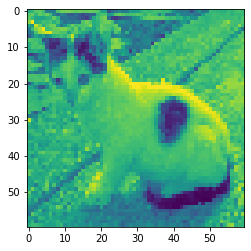

In [160]:
import cv2
import matplotlib.pyplot as plt
img_test=cv2.imread("Downloads/cat.jpg",cv2.IMREAD_GRAYSCALE)   #Taking image for actual test
img_test=cv2.resize(img_test,(60,60))
img_test=np.array(img_test).reshape(60,60,1)
img_test=img_test/255.0
plt.imshow(img_test)            #showing our loaded image
plt.show()

In [157]:
predict=model.predict(np.expand_dims(img_test, axis = 0))  #predict the test image and increast dimension (1,60,60,1) for feed

In [166]:
classes=["Dog","Cat"]
#plt.imshow(img_test)
if(predict>.5):
    index=1
else:
    index=0
    
print("This is predicted as =>{}<= and".format(classes[index]),"prediction:",predict)

This is predicted as =>Cat<= and prediction: [[0.9999921]]
